[View in Colaboratory](https://colab.research.google.com/github/koichi-inoue/JupyterNotebook/blob/master/NeuralNetwork02.ipynb)

# Neural Network
TensorFlow と Keras による 手書き文字の認識

## 準備
ライブラリとデータの読み込み

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

##データ数の確認
MNIST（エムニスト）データ：手書き文字認識用のデータ  
28px x 28px の画像 70,000枚  
訓練用 60,000枚  
テスト用 10,000枚  

In [17]:
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


##データを視覚化して確認
先頭の81個を 9 x 9 に並べて確認

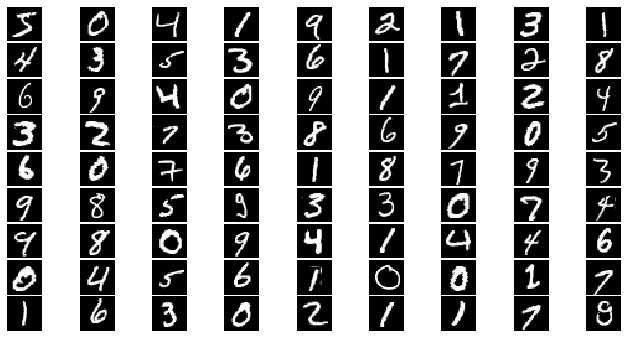

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

##テンソルデータのスケール変換
60,000枚 x 28x28 のテンソルを、60,000 x 784 の行列に、  
10,000枚 x 28x28 のテンソルを、10,000 x 784 の行列に変換し、
各画素の濃淡情報 0 -255 を 0 - 1 へ変換

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train/255.
x_test = x_test/255.

##クラスラベルを変形
ラベルの数字が入っているベクトルを 1-hot ベクトルに変換  
1-hot ベクトル：どれかひとつが 1 でその他が 0 となるベクトル  
60,000 x 1桁（ 0 - 9 ）のベクトル　＞　60,000 x 10桁（1-hotベクトル ）の 行列へ

In [0]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##ネットワークの構築
Sequential API  を用いた、多層ニューラルネットワーク  
入力層：784　←　28x28画素  
隠れ層：64  
出力層：10　←  0 - 9 を 1-hot ベクトルで  
　  
  
参考：1-hot-ベクトルとは以下のようなものです．

0 → [1,0,0,0,0,0,0,0,0,0]  
1 → [0,1,0,0,0,0,0,0,0,0]  
2 → [0,0,1,0,0,0,0,0,0,0]  
3 → [0,0,0,1,0,0,0,0,0,0]  


In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, input_shape=(784,), activation='relu'))
model.add(Dense(units=10, activation='softmax'))

##モデルをコンパイル
最適化手法(optimizer)，損失関数(loss)，評価指標(metrics)を指定

* loss: 損失関数(多値分類: categorical_crossentropy, 二値分類: binary_crossentropy)
* optimizer: 最適化手法
* metrics: 評価指標


In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

##機械学習


* epochs：モデルを学習するエポック数(学習データ全体を何回繰り返し学習させるか)を指定
* batch_size：学習データから設定したサイズ毎データを取り出し，計算を行う
* verbose:：ログ出力(0: 標準出力にログを出力しない，1: ログをプログレスバーで標準出力，2: エポック毎に1行のログを出力)

　　  
* loss：正解とどれくらい離れているかを意味する数値。0に近づくほど正解に近い。
* accuracy：正確性。100%に近いほど正解に近い。
* validation loss：検証データに対する loss
* validation accuracy：検証データに対する精度


In [87]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 3s - loss: 1.3046 - acc: 0.6707 - val_loss: 0.7041 - val_acc: 0.8608
Epoch 2/10
 - 2s - loss: 0.6268 - acc: 0.8496 - val_loss: 0.4573 - val_acc: 0.8942
Epoch 3/10
 - 2s - loss: 0.4856 - acc: 0.8748 - val_loss: 0.3770 - val_acc: 0.9053
Epoch 4/10
 - 2s - loss: 0.4259 - acc: 0.8855 - val_loss: 0.3370 - val_acc: 0.9103
Epoch 5/10
 - 2s - loss: 0.3919 - acc: 0.8916 - val_loss: 0.3125 - val_acc: 0.9158
Epoch 6/10
 - 2s - loss: 0.3689 - acc: 0.8968 - val_loss: 0.2958 - val_acc: 0.9198
Epoch 7/10
 - 2s - loss: 0.3519 - acc: 0.9009 - val_loss: 0.2829 - val_acc: 0.9217
Epoch 8/10
 - 2s - loss: 0.3386 - acc: 0.9044 - val_loss: 0.2729 - val_acc: 0.9270
Epoch 9/10
 - 2s - loss: 0.3276 - acc: 0.9073 - val_loss: 0.2656 - val_acc: 0.9267
Epoch 10/10
 - 2s - loss: 0.3179 - acc: 0.9098 - val_loss: 0.2575 - val_acc: 0.9282


## テスト用のデータでモデルの評価


In [88]:
score = model.evaluate(x_test, y_test, batch_size = 1)
print("正解率(accuracy)=", score[1])

10000/10000 [==============================] - 19s 2ms/step
正解率(accuracy)= 0.9178


##matplotlibを使って学習経過を表示

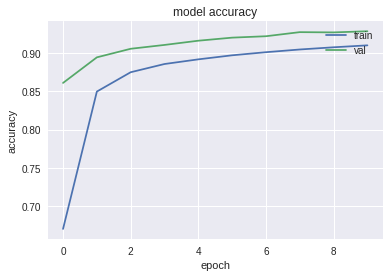

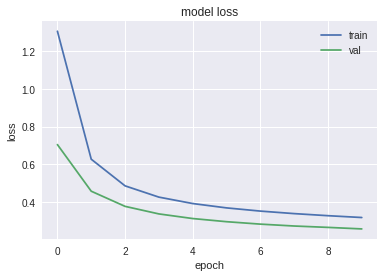

In [89]:
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()



##予測
100件分のデータを 混同行列（Confusion Matrix）で確認します

行は予測されたクラス (出力クラス) に対応し、  列は真のクラス (ターゲット クラス) に対応します。  
対角線上のセルは、正しく分類された観測値に対応します。  
対角線外のセルは、誤分類された観測値に対応します


In [90]:
import numpy as np
from sklearn.metrics import confusion_matrix

predict_classes = model.predict_classes(x_test[1:100,])
true_classes = np.argmax(y_test[1:100], 1)

print(confusion_matrix(true_classes, predict_classes))


[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  1  0  0]
 [ 0  0  1 10  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  1  0  0  0]
 [ 0  0  0  0  0  6  1  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  2  0  0  0  0  9]]


#手法を変えて

##モデルを初期化

In [0]:
#model.add(Dense(units=10, kernel_initializer="uniform"))

model = Sequential()

model.add(Dense(units=64, input_shape=(784,), activation='relu'))
model.add(Dense(units=10, activation='softmax'))


##モデルをコンパイル
Optimizerを Adom に変えてみます。

In [0]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

##機械学習


In [93]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 3s - loss: 0.4425 - acc: 0.8791 - val_loss: 0.2039 - val_acc: 0.9457
Epoch 2/10
 - 3s - loss: 0.2188 - acc: 0.9378 - val_loss: 0.1538 - val_acc: 0.9583
Epoch 3/10
 - 3s - loss: 0.1700 - acc: 0.9506 - val_loss: 0.1278 - val_acc: 0.9658
Epoch 4/10
 - 3s - loss: 0.1387 - acc: 0.9598 - val_loss: 0.1150 - val_acc: 0.9688
Epoch 5/10
 - 3s - loss: 0.1159 - acc: 0.9661 - val_loss: 0.1021 - val_acc: 0.9718
Epoch 6/10
 - 3s - loss: 0.0986 - acc: 0.9717 - val_loss: 0.1014 - val_acc: 0.9718
Epoch 7/10
 - 3s - loss: 0.0867 - acc: 0.9750 - val_loss: 0.0933 - val_acc: 0.9740
Epoch 8/10
 - 3s - loss: 0.0763 - acc: 0.9780 - val_loss: 0.0887 - val_acc: 0.9740
Epoch 9/10
 - 3s - loss: 0.0672 - acc: 0.9809 - val_loss: 0.0860 - val_acc: 0.9755
Epoch 10/10
 - 3s - loss: 0.0605 - acc: 0.9826 - val_loss: 0.0862 - val_acc: 0.9757


## テスト用のデータでモデルの評価


In [94]:
score = model.evaluate(x_test, y_test, batch_size = 1)
print("正解率(accuracy)=", score[1])

10000/10000 [==============================] - 19s 2ms/step
正解率(accuracy)= 0.9715


##matplotlibを使って学習経過を表示

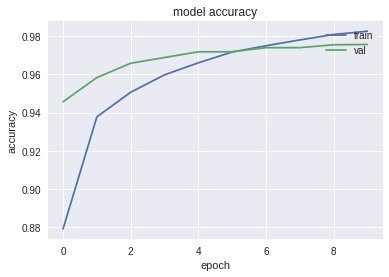

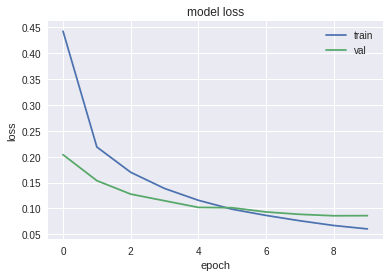

In [95]:
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()



##予測
100件分のデータで確認します

In [96]:
import numpy as np
from sklearn.metrics import confusion_matrix

predict_classes = model.predict_classes(x_test[1:100,], batch_size=32)
true_classes = np.argmax(y_test[1:100],1)
print(confusion_matrix(true_classes, predict_classes))

[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  6  1  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
